# MLP Deep Learning on the MNIST Dataset

## By Christopher Hauman
<br>

This guide will cover how to build a keras nerual network to categorize the [MNIST](http://yann.lecun.com/exdb/mnist/) Database of Handwritten Digits. This data contains handwritten digits fro 0-9 and their corresponding labels. *The code for this is an adapted example from [keras' domumentation](https://keras.io/examples/mnist_mlp/)*
<br>

We're going to cover importing the MNIST data, building a simple deep learning model in keras, and performing some optimizations on it. This will cover the most basic neural network form, Multilayer Perceptron (a type of feedforward neural network). If you're new to neural networks, I'd highly recommend you check out [3BLUE1BROWN](https://www.youtube.com/playlist?list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi)'s guide on them, which will give you all the basic information you need to know for this guide. This type of learning also falls under the umbrella of supervised machine learning, which you can learn much more about in my guides [here](https://github.com/chrisman1015/Supervised-Learning).
<br>

Note: This assumes you have basic knowledge of python data science basics. If you don't, or encounter something you're not familiar with, don't worry! You can get a crash course in my guide, [Cleaning MLB Statcast Data using pandas DataFrames and seaborn Visualization](https://github.com/chrisman1015/Cleaning-Statcast-Data/blob/master/Cleaning%20Statcast%20Data/Cleaning%20Statcast%20Data.ipynb). 
<br>


To begin, we'll import quite a few useful packages from keras, numpy, and visualization with seaborn and matplotlib. [Keras](https://keras.io/) is the premiere high-level neural network API, which is built on top of [tensorflow](https://www.tensorflow.org/guide/keras).

In [3]:
# import numpy for arrays
import numpy as np

# import keras libraries
import keras
from keras.models import load_model
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping

# import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

First, we'll load the data and take a look at the first X and y values in the training set:

First X in the training data:


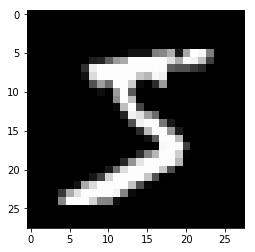


First y in the training data: 5


In [4]:
# import the data, split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()


# print the first X and y values
print("First X in the training data:")
plt.imshow(X_train[0], cmap='gray')
plt.show()
print("\nFirst y in the training data: " + str(y_train[0]))

We see that the x data contain images of written numbers, and the y data contains the label for that number. We're going to train our neural network to classify these images using the target labels. Let's also take a look at the shape of the X and y data:

# print the shapes of the data
print('\nThe X_training samples have a shape of', X_train.shape)
print('The y_training samples have a shape of', y_train.shape)

print('\nThe X_test samples have a shape of', X_test.shape)
print('The y_test samples have a shape of', y_test.shape)

The shape output shows there are 60000 drawn images, and each have a shape of 29x28 pixels (you can see this also on the axes of the image). There are also 60000 corresponding y labels for those images. We see the test sets have the same dimensions, except there are only 1000 samples.
<br>

While this shape is great for humans to interpret, it's not good at all for keras. To fix this, we'll first flatten the X images for both the training and test sets into one long array of 28x28 = 784 width:

In [6]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
print(X_train.shape, 'train samples')
print(X_test.shape, 'test samples')

(60000, 784) train samples
(10000, 784) test samples


Now that our data is in the correct shape, we need to check its type:

In [7]:
print('\nThe X_training samples have a data type of', X_train.dtype)
print('The y_training samples have a data type of', y_train.dtype)


The X_training samples have a data type of uint8
The y_training samples have a data type of uint8


keras natively uses float32 as its data type, so we need to force the X and y into that type:

In [8]:
# convert x values to float32
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

print('\nThe X_training samples have a data type of', X_train.dtype)
print('The X_test samples have a data type of', X_test.dtype)
print('\nThe y_training samples have a data type of', y_train.dtype)
print('The y_test samples have a data type of', y_test.dtype)


The X_training samples have a data type of float32
The X_test samples have a data type of float32

The y_training samples have a data type of float32
The y_test samples have a data type of float32


Now that the data is reshaped and in the correct type, we need to scale it. Currently, each X value (pixel) in the data contains a number between 0 and 255 to represent the grayscale brightness of the pixel, where 0 is pure black and 255 is pure white. We'll divide all the values by 255 to scale them to 1.

In [9]:
print("The mean pixel value of the first image in the X_training before scaling is ", np.mean(X_train[0]))

# scale pixel values from 0 to 1
X_train /= 255
X_test /= 255

print("The mean pixel value of the first image in the X_training after scaling is ", np.mean(X_train[0]))

The mean pixel value of the first image in the X_training before scaling is  35.108418
The mean pixel value of the first image in the X_training after scaling is  0.13768007


The X data are now in the correct, shape, type, and scaled to 1. But what about the y values? Remember, they currently hold the label for the corresponding image in X.

In [10]:
print("\nFirst y value in the training data is " + str(y_train[0]))


First y value in the training data is 5.0


Unfortunately, keras needs the target values to be categorical values, as it will be classifying them into different categories. We'll now convert the y training and test data into categorical data, with 10 classes representing the 10 possibly values for a number 0-9. If you were only classifying data into two categories, you'd use two classes instead of 10.

In [11]:
num_classes=10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print("\nFirst y value in the training data is " + str(y_train[0]))


First y value in the training data is [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


The y data are now categorical. Notice that the first y value in the training set corresponding to 5 has a 1 in the sixth index, corresponding to 5. Now we're ready to build our deep learning model!

***
Though may be a pain to take the steps to ensure your data is in the correct shape, scale, and type, it will pay dividends when it allows us to easily build a neural network with keras. 
<br>

We build models by first initializing our model in the same way we do for traditional supervised and unsupervised learning models. For now, we can stick with Sequential, which will have each layer building directly off and only off the previous layer. We'll also create a variable **ncols** to hold the number of columns in the sample data.

In [12]:
# get number of columns in sample data
ncols = X_train.shape[1]

# initalize sequentital model
model = Sequential()

We can now build each layer using **Model.add** to add layers to the model. We'll mainly stick to [Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) layers for now, which are the backbone of an [MLP neural network](https://machinelearningmastery.com/neural-networks-crash-course/).
<br>
<br>

### Arguments for the Dense Layers

**units** determines the dimensionality of the output space. If you choose 50, this dense layer will create and output to 50 neurons.<br>

**acactivation='relu'** 
applies the [ReLU](https://www.kaggle.com/dansbecker/rectified-linear-units-relu-in-deep-learning) function to the output of that layer. <br>

**input_shape** 
determines the number of neurons of the input data. This is absolutely crucial. You MUST specify the number of columns in the input shape, as the columns of the data are the input layer. <br> 
You don't have to specify the number of rows, as it's applying the algorithm row-wise on each sample until the end of the data. <br>

**activation='softmax'** 
for the output layer squashes each prediction to being between 0 and 1, where the sum of the prediction probabilities being 1. <br>
You can learn more about ReLU and Softmax [here](https://github.com/Kulbear/deep-learning-nano-foundation/wiki/ReLU-and-Softmax-Activation-Functions).<br>

*Note that the last layer uses num_classes to determine the number of neurons in the output layer. Remember we have 10 possible target values, so we'll have our model make its final prediction with those 10 options.*

In [15]:
# buld the model with 3 dense layers

# Input layer has ncols (784) neurons, and uses relu to output to 50 neurons
model.add(Dense(units=50, activation='relu', input_shape=(ncols,)))

# 25 neruon layer operating from the previous 50
model.add(Dense(25, activation='relu'))

# output layer to 10 neruons with softmax activation
model.add(Dense(num_classes, activation='softmax'))

Now that we've built our model, we can look at a quick summary:

In [16]:
# model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_2 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                260       
_________________________________________________________________
dense_4 (Dense)              (None, 50)                550       
_________________________________________________________________
dense_5 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                260       
_________________________________________________________________
dense_7 (Dense)              (None, 50)                550       
__________

We see there are 3 layers with 50, 25, and 10 neurons respectively:
<br>

The first layer has (784 weights from the previous neurons + 1 bias term for each connection) for the 50 neurons, which results in (784+1)$\times$50 = 39250. This means there are almost 40000 parameters being learned for the first layer alone. If you have any questions about this bias term, you can read more about it [here](https://stackoverflow.com/questions/2480650/role-of-bias-in-neural-networks).

The second layer has 51$\times$25 = 1275 parameters.

The final layer has 26$\times$10 = 260 parameters.
<br>

Summing them up, we see this model has a total of 40,785 parameters to learn how to label the images!

***
Now it's time to **compile** the model. We do this to configure the model to train it according to the parameters we decide.

**optimizer** controls the learning rate. <br>
"adam" is usually a good choice. It adjust the learning rate as it performs gradient descent, making it very versatile. <br>
Read more about learning rates [here](https://towardsdatascience.com/understanding-learning-rates-and-how-it-improves-performance-in-deep-learning-d0d4059c1c10).
"sgd" is [Stochiastic Gradient Descent](https://developers.google.com/machine-learning/crash-course/reducing-loss/stochastic-gradient-descent)

**loss** controls the loss function.<br>
"mean_squared_error" is common for regression. <br>
'categorical_crossentropy" is common for classification (very similar to [log loss](http://wiki.fast.ai/index.php/Log_Loss)). LOWER IS BETTER

**metrics** List of metrics to be evaluated by the model during training and testing. <br>
Typically, you will use "accuracy". This prints the model accuracy score at the end of each epoch.

In [18]:
# compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

# print the attributes of the model to ensure they're correct
print("Loss function: " + model.loss)
print("Optimizer: " + str(model.optimizer))
print("Metrics: " + str(model.metrics))

Loss function: categorical_crossentropy
Optimizer: <keras.optimizers.RMSprop object at 0x0000026F0039AB70>
Metrics: ['accuracy']


**batch_size** determines how much of the training set is run through each update of the model.
The update only runs a subset('batch') of the data to update the model. Each time you go through every batch (all the training data), it's called an epoch.

**epochs** determines how many times you cycle through your entire training data set.

**verbose** controls how the output is printed.
Accepts 0, 1, or 2 (I prefer 1).

**validation_data** uses the test data to calculate the accuracy of the model for each epoch.
<br>

Now let's fit the model:

In [24]:
# choose the batch size
batch_size = 128

# fit the model 
fit1 = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=5,
                    verbose=1,
                    validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 2s 36us/step - loss: 0.2286 - acc: 0.9474 - val_loss: 0.2627 - val_acc: 0.9465
Epoch 2/5
60000/60000 [==============================] - 2s 36us/step - loss: 0.1949 - acc: 0.9549 - val_loss: 0.2416 - val_acc: 0.9509
Epoch 3/5
60000/60000 [==============================] - 2s 36us/step - loss: 0.1694 - acc: 0.9598 - val_loss: 0.2354 - val_acc: 0.9514
Epoch 4/5
60000/60000 [==============================] - 2s 35us/step - loss: 0.1534 - acc: 0.9636 - val_loss: 0.2480 - val_acc: 0.9469
Epoch 5/5
60000/60000 [==============================] - 2s 38us/step - loss: 0.1366 - acc: 0.9672 - val_loss: 0.2368 - val_acc: 0.9507


We can use model.evaluate to test the trained set on the entire test set. We can also index the resulting score for the loss and accuracy values of the model:

In [25]:
# evaluate the model
score = model.evaluate(X_test, y_test, verbose=0)

# print model loss and accuracy
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.23681225686073304
Test accuracy: 0.9507


We see our final accuracy was 95.07% accurate when labeling out test data and our loss function was 0.236. We can save our model or load a model like this:

In [26]:
# save model to model.h5
model.save('model.h5')

# load model
my_model = load_model('model.h5')

***
We're going to now crank up our model to the next level! We'll add one more type of layer and a lot more neurons:
<br>

**[Dropout(0.2)](https://machinelearningmastery.com/dropout-regularization-deep-learning-models-keras/)** will randomly select 20% to be ignored downstream (for the rest of the layers).<br>
This prevents overfitting, a common challenge with machine learning algorithms.

In [27]:
# initalize sequentital model
model2 = Sequential()

# buld the model with 3 dense layers and 2 dropout layers

# Input layer has ncols (784) neurons, and uses relu to output to 512 neurons
model2.add(Dense(512, activation='relu', input_shape=(ncols,)))

# randomly drop 20% of the neurons
model2.add(Dropout(0.2))

# 512 neruon layer, taken from the previous 512 minus the 20% dropped
model2.add(Dense(512, activation='relu'))

# randomly drop 20% of the neurons
model2.add(Dropout(0.2))

# output layer to 10 neruons with softmax activation
model2.add(Dense(num_classes, activation='softmax'))

model2.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


We see our new model has a whopping 669,706 parameters! 

In [28]:
model2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print("Loss function: " + model2.loss)
print("Optimizer: " + str(model2.optimizer))
print("Metrics: " + str(model2.metrics))

Loss function: categorical_crossentropy
Optimizer: <keras.optimizers.Adam object at 0x00000270262350F0>
Metrics: ['accuracy']


We can also add an early stopping monitor. This is a way to automatically stop fitting the model when it's not improving in accuracy anymore. Patience = 3 means the model will stop fitting after 3 epochs without improved accuracy. By doing this, we can set a very high number of epochs, because we know the model will automatically stop after it maximizes accuracy.

In [29]:
# initialize early stopping monitor
early_stopping_monitor = EarlyStopping(patience=3)

Let's fit the second model now with the early stopping monitor:

In [30]:
batch_size = 128

# fit model with early stopping monitor
fit2 = model2.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=200,
                    callbacks = [early_stopping_monitor],
                    verbose=1,
                    validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 2s 40us/step - loss: 0.2511 - acc: 0.9251 - val_loss: 0.1036 - val_acc: 0.9687
Epoch 2/200
60000/60000 [==============================] - 2s 31us/step - loss: 0.1011 - acc: 0.9690 - val_loss: 0.0861 - val_acc: 0.9725
Epoch 3/200
60000/60000 [==============================] - 2s 30us/step - loss: 0.0708 - acc: 0.9776 - val_loss: 0.0778 - val_acc: 0.9762
Epoch 4/200
60000/60000 [==============================] - 2s 33us/step - loss: 0.0560 - acc: 0.9818 - val_loss: 0.0670 - val_acc: 0.9787
Epoch 5/200
60000/60000 [==============================] - 2s 30us/step - loss: 0.0459 - acc: 0.9849 - val_loss: 0.0687 - val_acc: 0.9785
Epoch 6/200
60000/60000 [==============================] - 2s 30us/step - loss: 0.0396 - acc: 0.9873 - val_loss: 0.0611 - val_acc: 0.9818
Epoch 7/200
60000/60000 [==============================] - 2s 30us/step - loss: 0.0318 - acc: 0.9893 - val_loss: 0.0817 - 

We see the model stopped early! I've run this model a few times, and it's stopped as early as the 4th epoch. 

In [31]:
score2 = model2.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score2[0])
print('Test accuracy:', score2[1])

Test loss: 0.07204517929189096
Test accuracy: 0.9813


We see our new loss function is only 0.072 and our test accuracy is 98.13%!
<br>

This bring us to the unique challenge of balancing the accuracy of the model with its computational cost. We improved our model by about 1% when adding many more neurons and some dropout layers, but it also took much longer to run. When building models on very large networks, you should be prepared to tweak your model quite a bit. Remember, the best model is not one which is simply accurate but is also as computationally efficient as possible.
<br>

To illustrate this idea, I'll quickly fit a third model right in the middle of the first two, with the two hidden layers having 128 and 64 neurons respectively.

In [52]:
# initalize sequentital model
model3 = Sequential()
model3.add(Dense(128, activation='relu', input_shape=(ncols,)))
model3.add(Dropout(0.15))
model3.add(Dense(64, activation='relu'))
model3.add(Dropout(0.15))
model3.add(Dense(num_classes, activation='softmax'))

model3.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

batch_size = 128

# fit model with early stopping monitor
fit3 = model2.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=200,
                    callbacks = [early_stopping_monitor],
                    verbose=1,
                    validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 2s 37us/step - loss: 0.0192 - acc: 0.9938 - val_loss: 0.0664 - val_acc: 0.9841
Epoch 2/200
60000/60000 [==============================] - 2s 35us/step - loss: 0.0172 - acc: 0.9942 - val_loss: 0.0652 - val_acc: 0.9850
Epoch 3/200
60000/60000 [==============================] - 2s 31us/step - loss: 0.0166 - acc: 0.9944 - val_loss: 0.0630 - val_acc: 0.9859
Epoch 4/200
60000/60000 [==============================] - 2s 30us/step - loss: 0.0138 - acc: 0.9956 - val_loss: 0.0785 - val_acc: 0.9823
Epoch 5/200
60000/60000 [==============================] - 2s 31us/step - loss: 0.0146 - acc: 0.9952 - val_loss: 0.0743 - val_acc: 0.9843
Epoch 6/200
60000/60000 [==============================] - 2s 32us/step - loss: 0.0147 - acc: 0.9950 - val_loss: 0.0871 - val_acc: 0.9827


We can use the [History](https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/) attribute of the fit to get the loss and accuracy of the training and test data. Let's compare the accuracy and loss for the test sets of each model: 

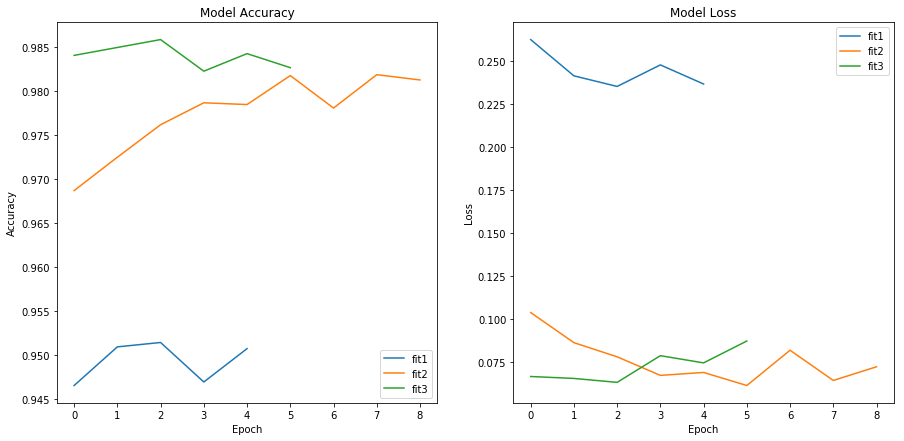

In [60]:
# summarize history for accuracy
plt.figure(figsize=(15, 7))

plt.subplot(1,2,1)    
plt.plot(fit1.history['val_acc'])
plt.plot(fit2.history['val_acc'])
plt.plot(fit3.history['val_acc'])

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['fit1', 'fit2', 'fit3'], loc='lower right')

plt.subplot(1,2,2)    
# summarize history for loss
plt.plot(fit1.history['val_loss'])
plt.plot(fit2.history['val_loss'])
plt.plot(fit3.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['fit1', 'fit2', 'fit3'], loc='upper right')
plt.show()

We see that the third model performed even better than the second, despite being much smaller and less computationally draining. Bigger is not always better, and you should always try to simplify your model when you can. 
<br>

That's all you need to get started building your own neural networks! In my next guide, we'll cover using a different type of network called a [Convolutional Neural Network](https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53) which is much better at picking out complex image patterns. I may also cover some parameter optimization techniques in the near future.
<br>
<br>